In [1]:
#Import libraries
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt

In [3]:
#Import dataset
message=pd.read_csv('spam.csv',names=["labels","message"])

#Print first 4 datapoints to check if dataset is loaded properly 
print(message.head())

  labels                                            message
0  Label                                          EmailText
1    ham  Go until jurong point, crazy.. Available only ...
2    ham                      Ok lar... Joking wif u oni...
3   spam  Free entry in 2 a wkly comp to win FA Cup fina...
4    ham  U dun say so early hor... U c already then say...


In [4]:
#General statistics
print(message.describe())
print(message.groupby('labels').describe())

       labels                 message
count    5573                    5573
unique      3                    5170
top       ham  Sorry, I'll call later
freq     4825                      30
       message                                                               
         count unique                                                top freq
labels                                                                       
Label        1      1                                          EmailText    1
ham       4825   4516                             Sorry, I'll call later   30
spam       747    653  Please call our customer service representativ...    4


In [5]:
#Creating a new column length for visualization of length of each datapoint
message['length']=message['message'].apply(len)
print(message.head())
message.length.describe()

  labels                                            message  length
0  Label                                          EmailText       9
1    ham  Go until jurong point, crazy.. Available only ...     111
2    ham                      Ok lar... Joking wif u oni...      29
3   spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
4    ham  U dun say so early hor... U c already then say...      49


count    5573.000000
mean       80.333214
std        59.851222
min         2.000000
25%        36.000000
50%        61.000000
75%       122.000000
max       910.000000
Name: length, dtype: float64

<AxesSubplot:ylabel='Frequency'>

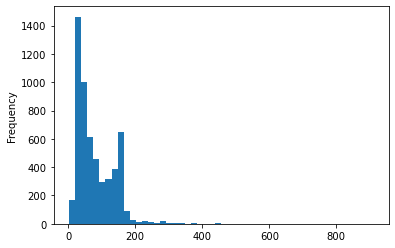

In [6]:
#Histogram of frequency of each length
message['length'].plot(bins=50,kind='hist')

In [7]:
#Pre-processing : Building a function to remove all punctuations and stop words

#Demonstrating removal of punctuations
import string
mess = 'sample message!...'
nopunc=[char for char in mess if char not in string.punctuation]
nopunc=''.join(nopunc)
nopunc.split()
print(nopunc)

sample message


In [8]:
#Demonstrating examples of stopwords
from nltk.corpus import stopwords
print(stopwords.words('english')[0:10])

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]


In [9]:
#Combining the above processes to create a filter function
def text_process(mess):
    nopunc =[char for char in mess if char not in string.punctuation]
    nopunc=''.join(nopunc)
    return [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

In [11]:
#Before and after
print(message.head())
print()
print(message['message'].head(5).apply(text_process))

  labels                                            message  length
0  Label                                          EmailText       9
1    ham  Go until jurong point, crazy.. Available only ...     111
2    ham                      Ok lar... Joking wif u oni...      29
3   spam  Free entry in 2 a wkly comp to win FA Cup fina...     155
4    ham  U dun say so early hor... U c already then say...      49

0                                          [EmailText]
1    [Go, jurong, point, crazy, Available, bugis, n...
2                       [Ok, lar, Joking, wif, u, oni]
3    [Free, entry, 2, wkly, comp, win, FA, Cup, fin...
4        [U, dun, say, early, hor, U, c, already, say]
Name: message, dtype: object
